# SMclarify Bias metrics example usage

In [1]:
from smclarify.bias.report import *
from smclarify.util.dataset import Datasets, german_lending_readable_values
from typing import Dict
from collections import defaultdict

Get the [german lending dataset](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)). Transform the values to human readable strings from the dataset description. Dataset is functionally equivalent.


In [2]:
#df = pd.read_csv('../german.data', header=None, sep=' ')
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', header=None, sep=' ')
df.columns = ["CheckingAC_Status","MaturityMonths","CreditHistory","Purpose","LoanAmount","SavingsAC",
                  "Employment","InstalmentPctOfIncome","SexAndStatus","OtherDebts","PresentResidenceYears",
                  "Property","Age","OtherInstalmentPlans","Housing","NumExistingLoans","Job",
                  "Dependents","Telephone","ForeignWorker","Class1Good2Bad"]
df = german_lending_readable_values(df)
df.shape
df['target']

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: target, Length: 1000, dtype: category
Categories (2, int64): [0, 1]

In [3]:
df.head()

,CheckingAC_Status,MaturityMonths,CreditHistory,Purpose,LoanAmount,SavingsAC,Employment,InstalmentPctOfIncome,SexAndStatus,OtherDebts,...,Property,Age,OtherInstalmentPlans,Housing,NumExistingLoans,Job,Dependents,Telephone,ForeignWorker,target
0,x < 0 DM,6,critical accnt. / other credits,radio/tv,1169,unknown,x >= 7 years,4,male single,none,...,real estate,67,none,own,2,skilled employee / official,1,yes,yes,1
1,0 <= x < 200 DM,48,existing credits paid,radio/tv,5951,x < 100 DM,1 <= x < 4 years,2,female divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,0
2,no checking account,12,critical accnt. / other credits,education,2096,x < 100 DM,4 <= x < 7 years,2,male single,none,...,real estate,49,none,own,1,unskilled-resident,2,none,yes,1
3,x < 0 DM,42,existing credits paid,forniture,7882,x < 100 DM,4 <= x < 7 years,2,male single,guarantor,...,soc. savings / life insurance,45,none,for free,1,skilled employee / official,2,none,yes,1
4,x < 0 DM,24,delay,new car,4870,x < 100 DM,1 <= x < 4 years,3,male single,none,...,unknown,53,none,for free,2,skilled employee / official,2,none,yes,0


In [4]:
import seaborn as sns

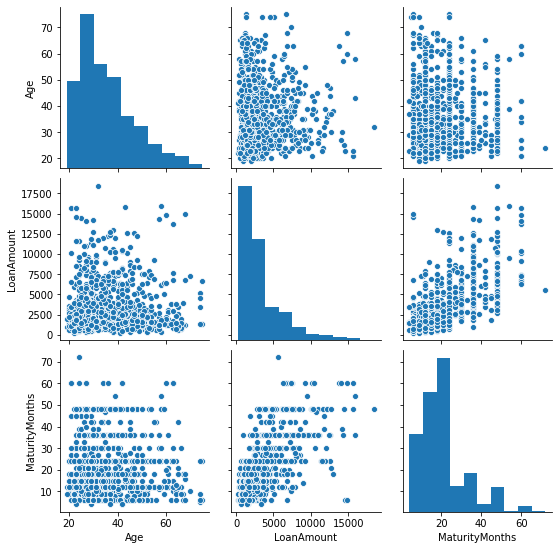

In [5]:
sns.pairplot(df[['Age','LoanAmount','MaturityMonths']])

<AxesSubplot:xlabel='ForeignWorker', ylabel='count'>

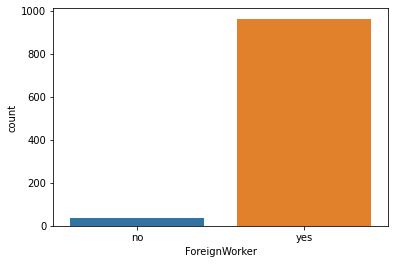

In [6]:
sns.countplot(df['ForeignWorker'])

## Calculate pre-training bias metrics

In [7]:
# Measure bias for the ForeignWorker attribute
facet_column = FacetColumn('ForeignWorker')
label_column = LabelColumn('target', df['target'], [1])
group_variable = df["Housing"]

In [8]:
report = bias_report(df, facet_column, label_column, stage_type=StageType.PRE_TRAINING, group_variable=group_variable)

In [9]:
report


[{'value_or_threshold': 'yes',
  'metrics': [{'name': 'CI',
    'description': 'Class Imbalance (CI)',
    'value': -0.926},
   {'name': 'DPL',
    'description': 'Difference in Positive Proportions in Labels (DPL)',
    'value': 0.1992646852459936},
   {'name': 'KL',
    'description': 'Kullback-Liebler Divergence (KL)',
    'value': 0.2107056841761436},
   {'name': 'JS',
    'description': 'Jensen-Shannon Divergence (JS)',
    'value': 0.0529310162599229},
   {'name': 'LP', 'description': 'L-p Norm (LP)', 'value': 0.2818028203768902},
   {'name': 'TVD',
    'description': 'Total Variation Distance (TVD)',
    'value': 0.19926468524599364},
   {'name': 'KS',
    'description': 'Kolmogorov-Smirnov Distance (KS)',
    'value': 0.3985293704919873},
   {'name': 'CDDL',
    'description': 'Conditional Demographic Disparity in Labels (CDDL)',
    'value': 0.03290400123352098}]},
 {'value_or_threshold': 'no',
  'metrics': [{'name': 'CI',
    'description': 'Class Imbalance (CI)',
    'value'

In [10]:
# Measure bias for the Age attribute
facet_column = FacetColumn('Age', [40])


In [11]:
report = bias_report(df, facet_column, label_column, stage_type=StageType.PRE_TRAINING, group_variable=group_variable)

In [12]:
report

[{'metrics': [{'name': 'CI',
    'description': 'Class Imbalance (CI)',
    'value': 0.452},
   {'name': 'DPL',
    'description': 'Difference in Positive Proportions in Labels (DPL)',
    'value': -0.05127586414912222},
   {'name': 'KL',
    'description': 'Kullback-Liebler Divergence (KL)',
    'value': 0.009096021174257826},
   {'name': 'JS',
    'description': 'Jensen-Shannon Divergence (JS)',
    'value': 0.0019251366827441468},
   {'name': 'LP',
    'description': 'L-p Norm (LP)',
    'value': 0.07251502250208905},
   {'name': 'TVD',
    'description': 'Total Variation Distance (TVD)',
    'value': 0.05127586414912225},
   {'name': 'KS',
    'description': 'Kolmogorov-Smirnov Distance (KS)',
    'value': 0.1025517282982445},
   {'name': 'CDDL',
    'description': 'Conditional Demographic Disparity in Labels (CDDL)',
    'value': -0.06017778064937399}],
  'value_or_threshold': '(40, 75]'}]